Cabeçalho das colunas:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Resumo estatístico:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.

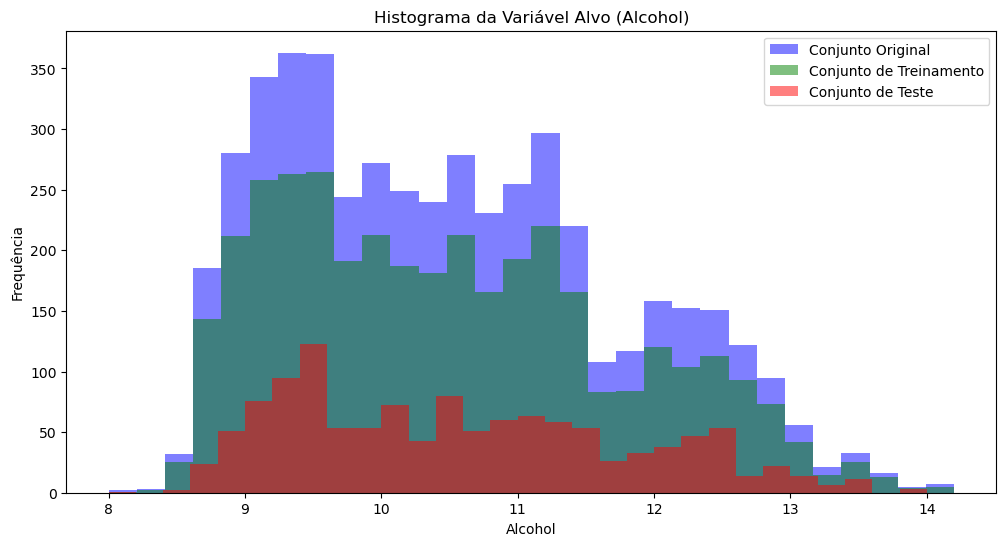


Estatísticas comparativas:
Média Original: 10.51
Média Treinamento: 10.51
Média Teste: 10.53

Desvio Padrão Original: 1.23
Desvio Padrão Treinamento: 1.23
Desvio Padrão Teste: 1.23


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Passo 1: Ler a planilha CSV
wine_data = pd.read_csv("winequality-white.csv", sep=";")

# Mostrar cabeçalho e resumo estatístico
print("Cabeçalho das colunas:")
print(wine_data.columns)

print("\nResumo estatístico:")
print(wine_data.describe())

# Remover a coluna 'quality'
wine_data = wine_data.drop(columns=['quality'])

# Passo 2: Separar os dados em conjunto de treinamento e teste
train_data, test_data = train_test_split(wine_data, test_size=0.25, random_state=42)

# Salvar os conjuntos de treinamento e teste em arquivos CSV
train_data.to_csv("wine_trainv4.csv", index=False)
test_data.to_csv("wine_testv4.csv", index=False)

# Passo 3: Plotar histograma comparando a variável alvo (alcohol)
plt.figure(figsize=(12, 6))
plt.hist(wine_data['alcohol'], bins=30, alpha=0.5, label='Conjunto Original', color='blue')
plt.hist(train_data['alcohol'], bins=30, alpha=0.5, label='Conjunto de Treinamento', color='green')
plt.hist(test_data['alcohol'], bins=30, alpha=0.5, label='Conjunto de Teste', color='red')
plt.xlabel('Alcohol')
plt.ylabel('Frequência')
plt.legend()
plt.title('Histograma da Variável Alvo (Alcohol)')
plt.show()

# Passo 4: Estatísticas comparativas
print("\nEstatísticas comparativas:")
original_mean = wine_data['alcohol'].mean()
train_mean = train_data['alcohol'].mean()
test_mean = test_data['alcohol'].mean()

original_std = wine_data['alcohol'].std()
train_std = train_data['alcohol'].std()
test_std = test_data['alcohol'].std()

print(f'Média Original: {original_mean:.2f}')
print(f'Média Treinamento: {train_mean:.2f}')
print(f'Média Teste: {test_mean:.2f}')
print()
print(f'Desvio Padrão Original: {original_std:.2f}')
print(f'Desvio Padrão Treinamento: {train_std:.2f}')
print(f'Desvio Padrão Teste: {test_std:.2f}')

RMSE: 0.38
R^2: 0.91


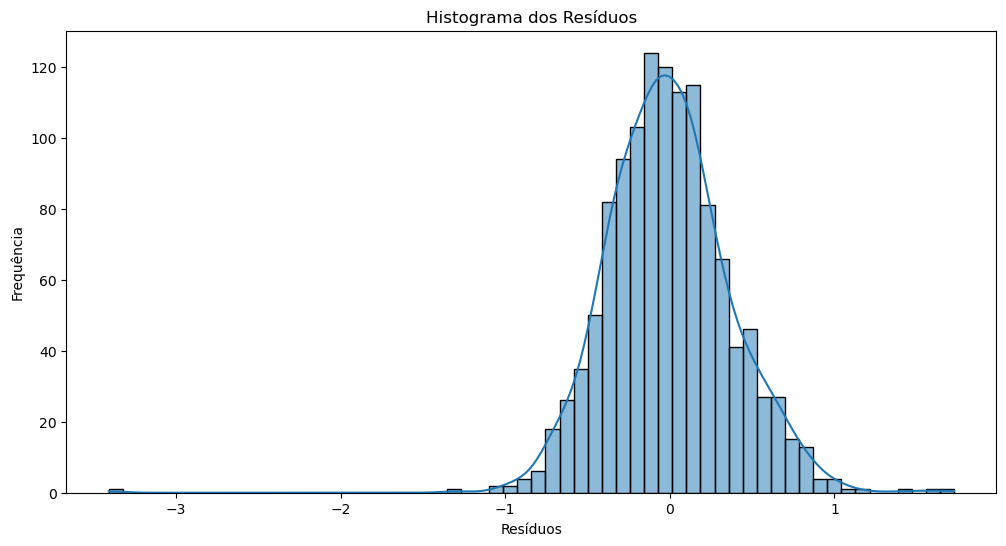

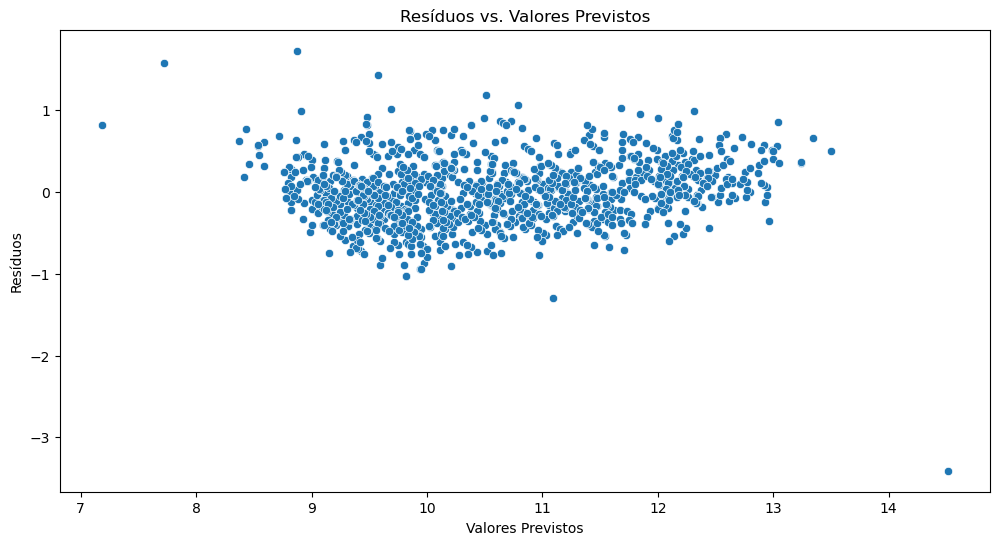

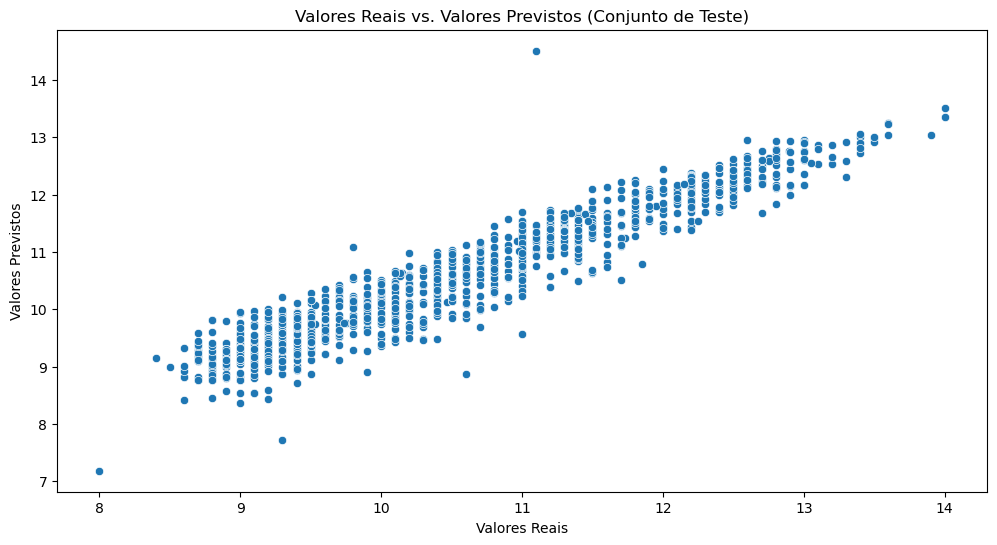

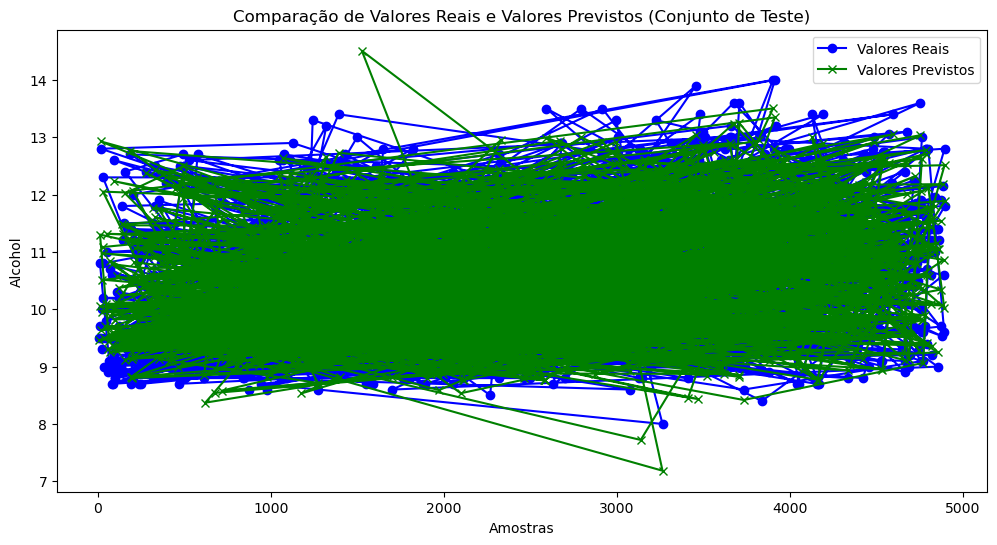

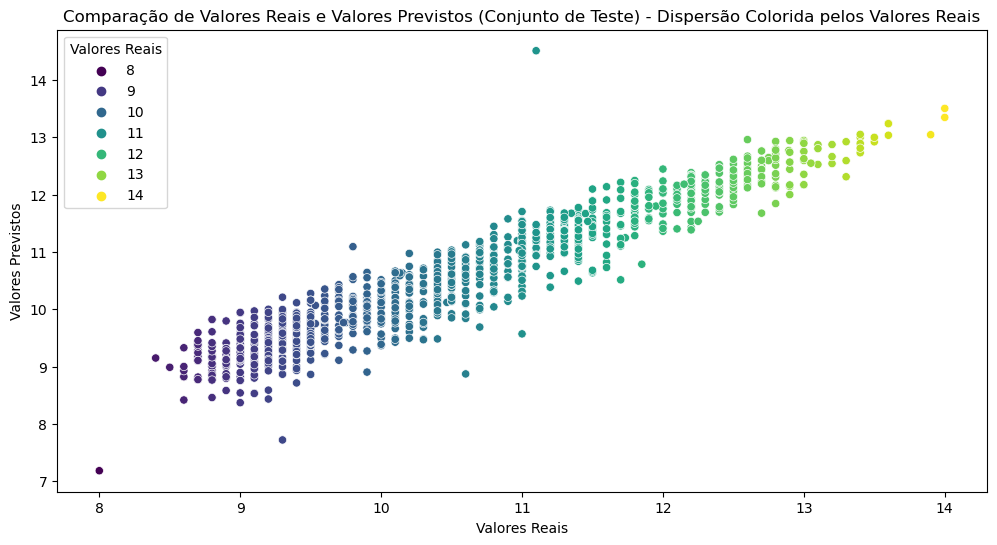

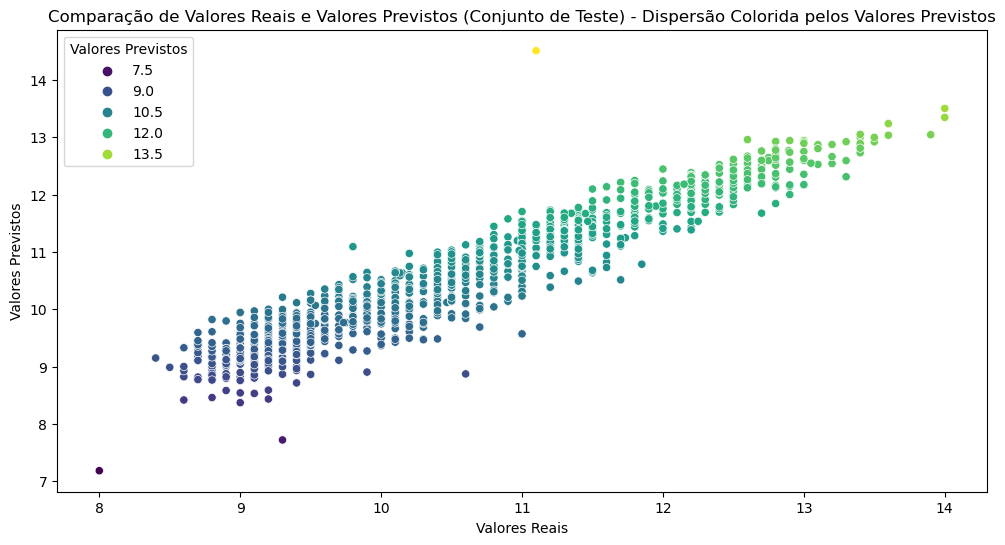

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Etapa 3: Pré-processamento e normalização
scaler = StandardScaler()
X_train = train_data.drop(columns=['alcohol'])
X_test = test_data.drop(columns=['alcohol'])

# Normalização dos dados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = train_data['alcohol']
y_test = test_data['alcohol']

# Etapa 4: Treinamento do modelo OLS
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)

# Previsões no conjunto de teste
y_pred = ols_model.predict(X_test_scaled)

# Cálculo das métricas RMSE e R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

# Plotar histograma dos resíduos
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')

# Plotar Resíduos vs. Valores Previstos
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos')

# Plotar Valores Reais vs. Valores Previstos (Conjunto de Teste)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (Conjunto de Teste)')

# Plotar gráfico de linhas comparando valores reais e valores previstos (Conjunto de Teste)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Valores Reais', marker='o', linestyle='-', color='blue')
plt.plot(y_test.index, y_pred, label='Valores Previstos', marker='x', linestyle='-', color='green')
plt.xlabel('Amostras')
plt.ylabel('Alcohol')
plt.legend()
plt.title('Comparação de Valores Reais e Valores Previstos (Conjunto de Teste)')

# Criar um DataFrame com os valores reais e previstos
comparison_df = pd.DataFrame({'Valores Reais': y_test, 'Valores Previstos': y_pred})

# Plotar gráfico de dispersão colorindo os pontos de acordo com os valores reais
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Valores Reais', y='Valores Previstos', data=comparison_df, hue='Valores Reais', palette='viridis')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação de Valores Reais e Valores Previstos (Conjunto de Teste) - Dispersão Colorida pelos Valores Reais')

plt.show()

# Plotar gráfico de dispersão colorindo os pontos de acordo com os valores previstos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Valores Reais', y='Valores Previstos', data=comparison_df, hue='Valores Previstos', palette='viridis')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação de Valores Reais e Valores Previstos (Conjunto de Teste) - Dispersão Colorida pelos Valores Previstos')

plt.show()

plt.show()


Validação Cruzada 5 dobras:
RMSE em Cada Dobra: [0.3961075259516188, 0.39791991731099374, 0.758304441157943, 0.3783691783491233, 0.3798457466480433]
R^2 em Cada Dobra: [0.9000133924659988, 0.8859794726745052, 0.6349226141402236, 0.901663014677984, 0.9083884510876562]
Média RMSE: 0.46210936188354446
Média R^2: 0.8461933890092735

Validação Cruzada 10 dobras:
RMSE em Cada Dobra: [0.3851196871553578, 0.40008491552643544, 0.422351218605696, 0.3698977958646964, 1.003359078233292, 0.401012966607095, 0.3616446220088705, 0.3872426819448991, 0.37678267858713677, 0.3761611618850978]
R^2 em Cada Dobra: [0.9091807943560001, 0.8933074147156599, 0.8680740148492462, 0.9039762314463572, 0.30555728459616116, 0.9047435573233498, 0.9101497068986126, 0.8970128523009949, 0.9121283861191454, 0.9072857768079221]
Média RMSE: 0.4483656806418577
Média R^2: 0.8411416019413449


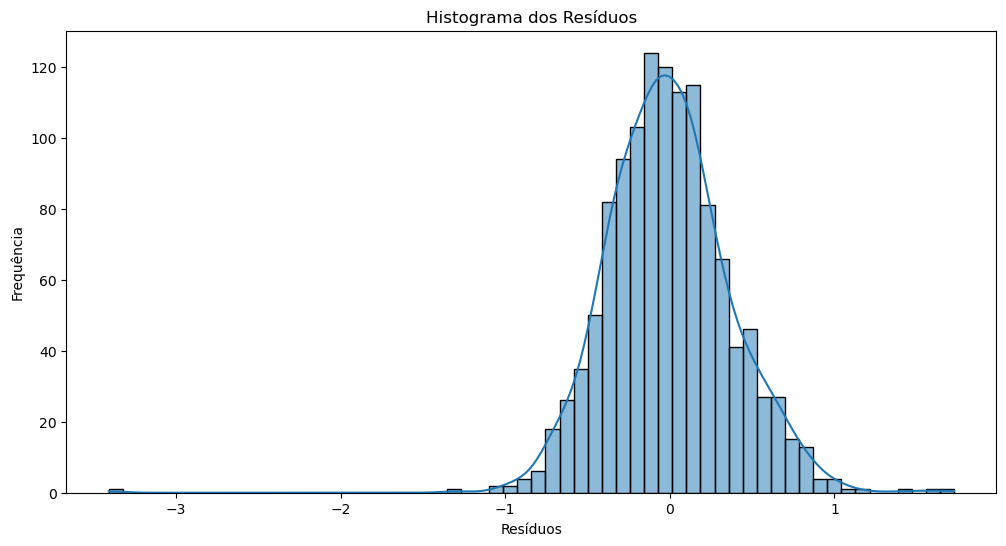

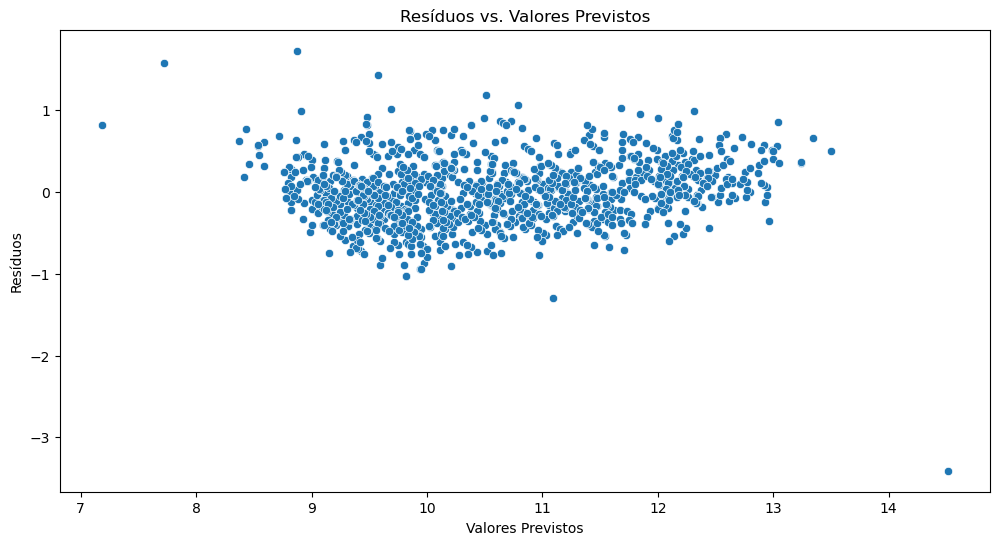

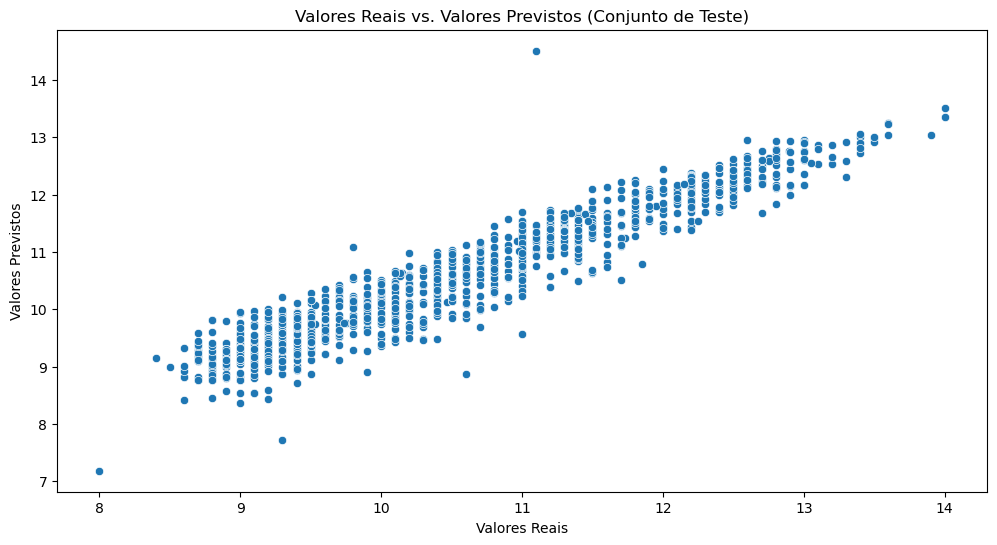

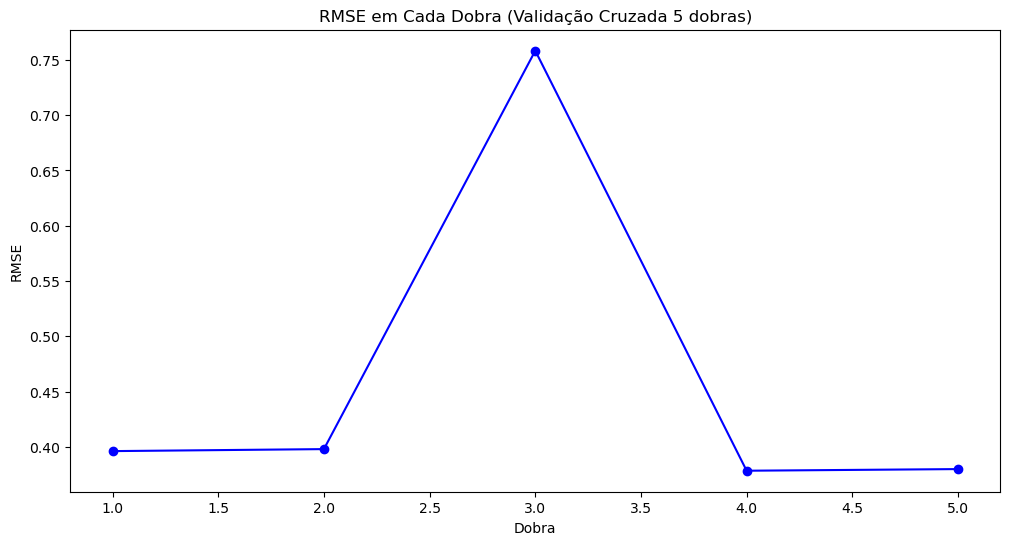

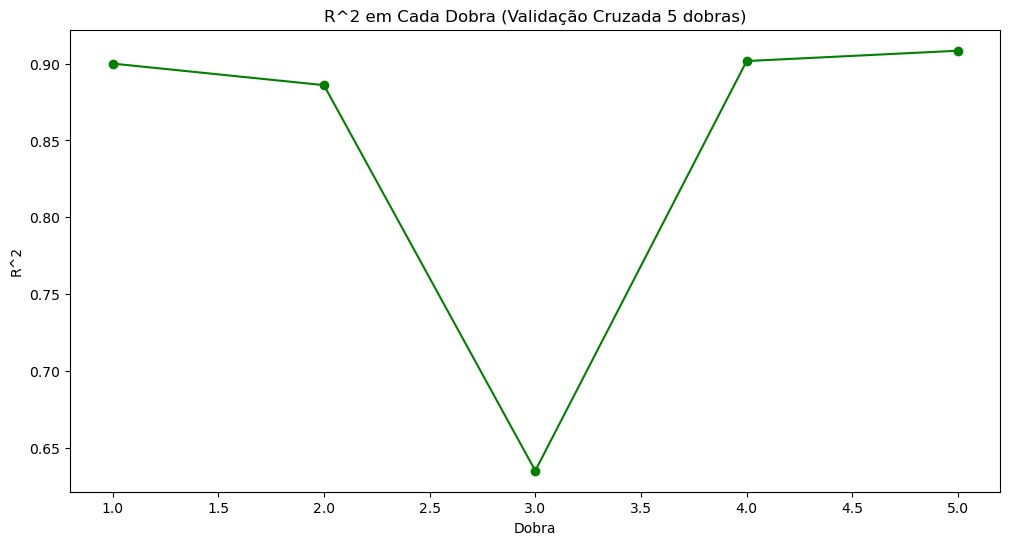

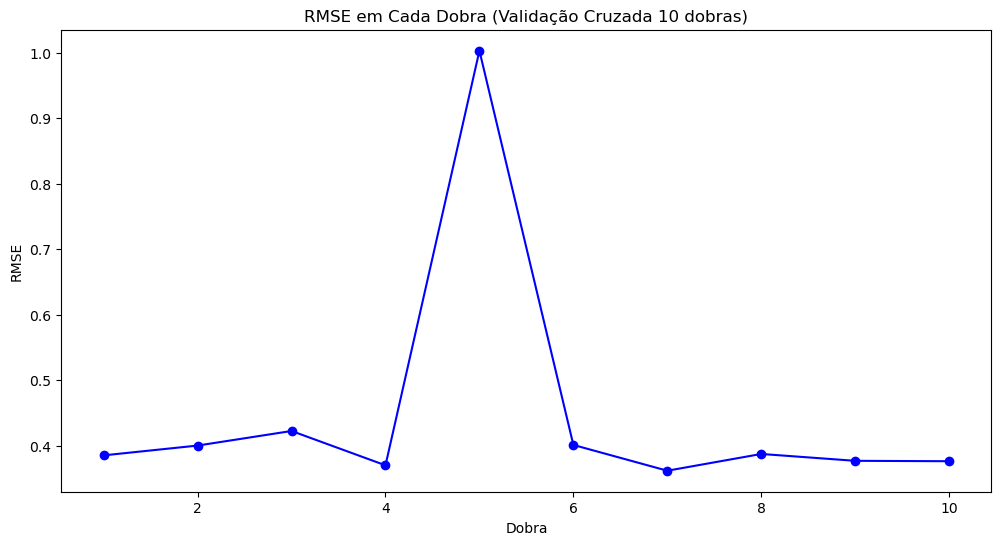

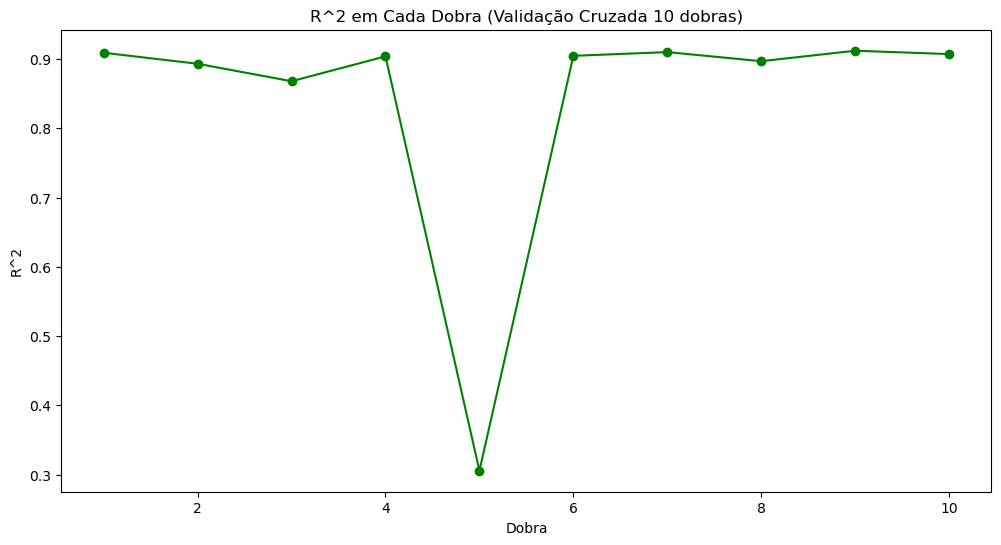

In [6]:
from sklearn.model_selection import cross_val_predict, KFold

# Validação Cruzada de 5 dobras
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores_5fold = []
r2_scores_5fold = []

for train_index, test_index in kf5.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)
    
    rmse_fold = mean_squared_error(y_val_fold, y_pred_fold, squared=False)
    r2_fold = r2_score(y_val_fold, y_pred_fold)
    
    rmse_scores_5fold.append(rmse_fold)
    r2_scores_5fold.append(r2_fold)

# Médias das métricas RMSE e R^2 (Validação Cruzada 5 dobras)
mean_rmse_5fold = np.mean(rmse_scores_5fold)
mean_r2_5fold = np.mean(r2_scores_5fold)

print("Validação Cruzada 5 dobras:")
print("RMSE em Cada Dobra:", rmse_scores_5fold)
print("R^2 em Cada Dobra:", r2_scores_5fold)
print("Média RMSE:", mean_rmse_5fold)
print("Média R^2:", mean_r2_5fold)

# Validação Cruzada de 10 dobras
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_scores_10fold = []
r2_scores_10fold = []

for train_index, test_index in kf10.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)
    
    rmse_fold = mean_squared_error(y_val_fold, y_pred_fold, squared=False)
    r2_fold = r2_score(y_val_fold, y_pred_fold)
    
    rmse_scores_10fold.append(rmse_fold)
    r2_scores_10fold.append(r2_fold)

# Médias das métricas RMSE e R^2 (Validação Cruzada 10 dobras)
mean_rmse_10fold = np.mean(rmse_scores_10fold)
mean_r2_10fold = np.mean(r2_scores_10fold)

print("\nValidação Cruzada 10 dobras:")
print("RMSE em Cada Dobra:", rmse_scores_10fold)
print("R^2 em Cada Dobra:", r2_scores_10fold)
print("Média RMSE:", mean_rmse_10fold)
print("Média R^2:", mean_r2_10fold)

# Plotar os gráficos solicitados
# Histograma dos Resíduos
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')

# Resíduos vs. Valores Previstos
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos')

# Valores Reais vs. Valores Previstos (Conjunto de Teste)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (Conjunto de Teste)')

# RMSE em Cada Dobra (Validação Cruzada 5 dobras)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), rmse_scores_5fold, marker='o', linestyle='-', color='blue')
plt.xlabel('Dobra')
plt.ylabel('RMSE')
plt.title('RMSE em Cada Dobra (Validação Cruzada 5 dobras)')

# R2 em Cada Dobra (Validação Cruzada 5 dobras)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), r2_scores_5fold, marker='o', linestyle='-', color='green')
plt.xlabel('Dobra')
plt.ylabel('R^2')
plt.title('R^2 em Cada Dobra (Validação Cruzada 5 dobras)')

# RMSE em Cada Dobra (Validação Cruzada 10 dobras)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), rmse_scores_10fold, marker='o', linestyle='-', color='blue')
plt.xlabel('Dobra')
plt.ylabel('RMSE')
plt.title('RMSE em Cada Dobra (Validação Cruzada 10 dobras)')

# R2 em Cada Dobra (Validação Cruzada 10 dobras)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), r2_scores_10fold, marker='o', linestyle='-', color='green')
plt.xlabel('Dobra')
plt.ylabel('R^2')
plt.title('R^2 em Cada Dobra (Validação Cruzada 10 dobras)')

plt.show()